# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [2]:
!python3 -m pip install seaborn

In [3]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_speaker_listener_v4


In [5]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [6]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

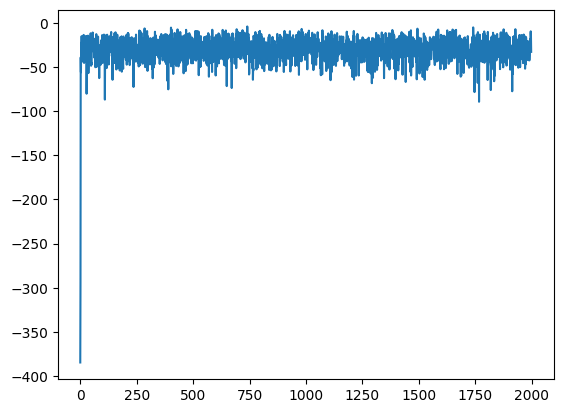

In [7]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [8]:
print(fitnesses[0][0:20])

[-384.6654936749879, -293.8555265247123, -38.95589130986161, -55.822820373219976, -22.493150751035056, -36.638435986340845, -14.928230668521033, -34.12296728158482, -15.96476897503824, -29.890921753016084, -34.49891303465265, -18.86939595967569, -29.597341103226444, -41.671636634281356, -44.31775207228595, -13.50593424608671, -29.14057817775465, -45.24809561705157, -32.0643816261085, -19.9185659851498]


In [9]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-20.09631416322806, -50.820949087371844, -8.21853301157231, -179.7532547765075, -217.4035982514768, -162.89059153402954, -44.84348573009081, -101.28182178875359, -35.481137832196694, -210.26877247915127, -126.16081949818984, -86.35666625252105, -177.72638188524303, -72.96561048108882, -143.37583668360418, -38.77109332196708, -43.16106549861381, -13.260022317166179, -11.631831272463371, -81.64519546908588]


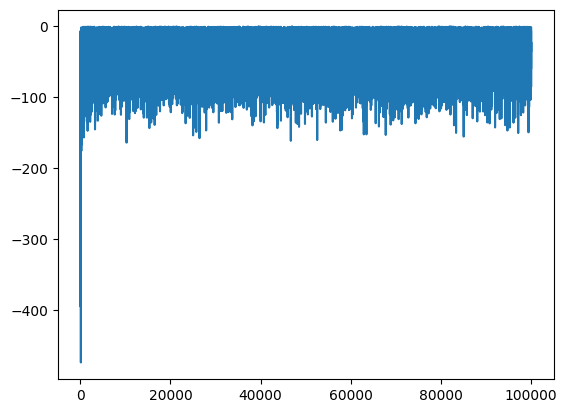

In [10]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

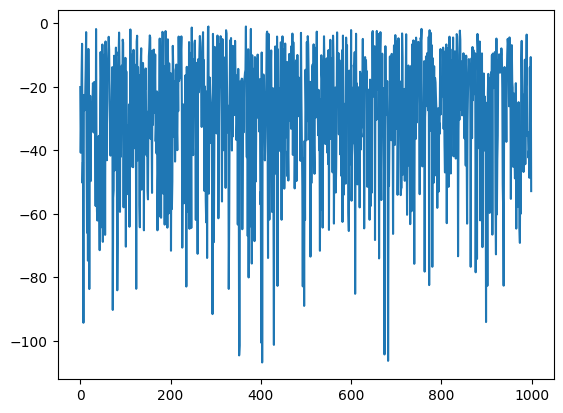

In [11]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

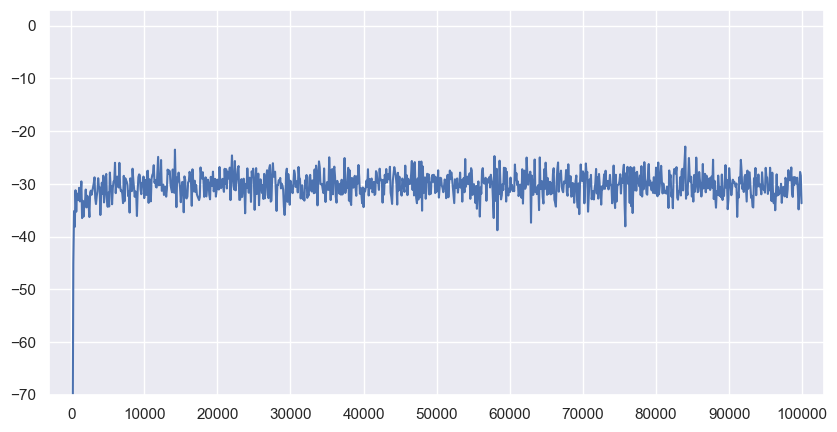

In [15]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-70,3)

plt.savefig("score_simple_speaker_listener_v4.png")
plt.show()

In [13]:
score[1:101].mean()

0   -97.427511
dtype: float64